# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Para este projeto, iremos analisar uma base de dados disponível aqui, para criarmos um modelo de regressão capaz de prever valores da variável **renda** com as demais variáveis na base.

Para o desenolvimento do projeto, vamos utilizar este notebook para a nossa etapa de exploração, preparação, análise, modelagem e análise de resultados do modelo. Vamos utilizar as principais ferramentas da área como: **pandas**, **numpy**, **seaborn**, **matplotlib** e **scikit-learn**.

Vamos utilizar conceitos estatísticos para a nossa modelagem e o modelo final será implementando através de uma aplicação web com a ferramenta **streamlit**, ficando disponível apenas localmente.

Os objetivos deste projeto são:
- O desenvolvimento do zero de um projeto seguindo o modelo de desenvolvimento **Crisp-DM**
- A implementação de um modelo pré-treinado numa aplicação web


## Etapa 2 Crisp-DM: Entendimento dos dados
A nossa base de dados representa informações coletadas de uma população aleatória, os dados forma disponibilizados pela instituição de ensino EBAC e sua versão original podem ser encontradas aqui.


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  A data em que os dados foram inseridos na base                                     | str |
| id_cliente              |  O valor de identificação de um cliente na base                                    | int |
| sexo                    |  O sexo de um cliente na base (F, M)                                     | str |
| posse_de_veiculo        |  Se o cliente possui veículo ou não (True, False)                                    | bool |
| posse_de_imovel         |  Se o cliente possui imóvel ou não (True, False)                                    | bool |
| qtd_filhos              |  O número de filhos que o cliente possui                                    | int |
| tipo_renda              |  A origem da renda do cliente                                     | str |
| educacao                |  O nível de escolaridade do cliente                                     | str |
| estado_civil            |  O estado civil do cliente                                    | str |
| tipo_residencia         |  O tipo de residência do cliente                                      | str |
| idade                   |  A idade do cliente                                    | int |
| tempo_emprego           |  A quanto tempo o cliente esteve empregado                                      | float |
| qt_pessoas_residencia   |  A quantidade de pessoas na residência do cliente                                     | float |
| renda                   |  O valor da renda do cliente                                     | float |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from ydata_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('../data/raw/previsao_de_renda.csv').drop('Unnamed: 0', axis=1)
renda.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados
Nesta etapa iremos avaliar a distribuição de todas as variáveis. 

In [3]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof.to_file('../reports/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A partir da análise do relatório criado, é possivel constatar que:

- Existem ID duplicados na base de dados

- Algumas variáveis categóricas estão enviesadas (predominância maior de uma classe em detrimento das outras)

- Existem linhas com dados faltando

## Pré-analise

Vamos analisar o nosso conjunto de dados e modifica-lo conforme a necessidade para criar uma base mais apropriada para começar a modelagem.
Vamos começar pelos IDs duplicados.

In [5]:
id_duplicados = [id for id in renda['id_cliente'].value_counts().index if renda['id_cliente'].value_counts()[id] != 1]
count_id_Duplicados = renda.loc[renda['id_cliente'].isin(id_duplicados)].sort_values(by='id_cliente').groupby('data_ref')['id_cliente'].count()
count_id_Totais = renda.groupby('data_ref')['id_cliente'].count()

print('='*80)
print('Total de ID por data de registro na base de dados:')
print('='*80)
print(count_id_Totais)
print('='*80)
print('Total de ID duplicados por data de registro na base de dados:')
print('='*80)
print(count_id_Duplicados)
print('='*80)
print('Total de ID únicos por data de registro na base de dados:')
print('='*80)
print(count_id_Totais - count_id_Duplicados)

Total de ID por data de registro na base de dados:
data_ref
2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: id_cliente, dtype: int64
Total de ID duplicados por data de registro na base de dados:
data_ref
2015-01-01    620
2015-02-01    622
2015-03-01    579
2015-04-01    595
2015-05-01    592
2015-06-01    598
2015-07-01    593
2015-08-01    602
2015-09-01    603
2015-10-01    601
2015-11-01    598
2015-12-01    603
2016-01-01    612
2016-02-01    601
2016-03-01    579
Name: id_cliente, dtype: int64
Total de ID únicos por data de registro na base de dados:
data_ref
2015-01-01    380
2015-02-01    378
2015-03-01    421
2015-04-01    405
2015-05-01    408
2015-06-01    402
2015-07-01    407
2015-08-01    398
2015-09-01    397
2015-10-01    399
2015-

In [6]:
renda.loc[renda['id_cliente'].isin(id_duplicados)].sort_values(by='id_cliente').head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
9064,2015-10-01,1,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
7077,2015-08-01,1,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
9212,2015-10-01,2,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
7377,2015-08-01,2,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
13907,2016-02-01,8,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,373.93


Como podemos observar acima, atráves da contagem de IDs únicos e a amostragem dos IDs duplicado, a mesma pessoa foi reintroduzida na base de dados em datas diferentes, como esses dados podem afetar o modelo, vamos elimina-los na próxima etapa.

Para o próximo passo dessa etapa da nossa análise, vamos transformar a coluna **data_ref** em um formato de mais fácil manipulação.

In [7]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
renda['data_ref']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
14995   2016-03-01
14996   2016-03-01
14997   2016-03-01
14998   2016-03-01
14999   2016-03-01
Name: data_ref, Length: 15000, dtype: datetime64[ns]

### Análise de Entropia

Para avaliar a **qualidade** das variávieis no que diz respeito a sua variabilidade, vamos observar a **entropia** das mesmas. No nosso caso em específicio, é prefencial que nossas variáveis tenha uma alta entropia, pois isso significa mais diversidade nas proporções das classes e um maior grau de aleatoriedade na variável, permitindo uma indução menos enviesada pelo conjunto usado para treinar o modelo.

Para isso, vamos utilizar funções computacionais de entropia, definidas pela fórmula matemática proposta pela **Teoria da Informação**, de *Claude E. Shannon*.

$$ H(x) = - \sum^n_{i=1} P(x_i)log_2P(x_i)$$

Onde:

- $n$ é o número de classes dentro da variável $x$
- $i$ são as classes
- $x$ é a variável categórica
- $P(x_i)$ é a probabilidade de uma classe aleatória ser selecionada, aleatoriamente, do conjunto de classes da variável, em outros termos, é a **frequência** daquela classe no conjunto da variável $x$
- $log_2P(x_i)$ é o módulo da medida de **informação** da classe

Com o intuito de avaliar a entropia de cada variável categórica, nós vamos considerar o cálculo do valor *máximo* de entropia de uma variável categórica, dado pela fórmula:

$$H(x) = log_2P(x_i)$$

Segue abaixo as funções que usaremos para calcular a entropia das variáveis categóricas. 


In [8]:
def calcular_entropia(tab_freq):
    h = 0
    for classe in tab_freq.index:
        h += tab_freq[classe] * np.log2(tab_freq[classe])
    return h * -1

def calcular_entropia_maxima(tab_freq):
    return np.log2(len(tab_freq))

In [9]:
taxas_entropia_antes = dict()

for col in renda.select_dtypes(include=['object', 'bool']).columns:
    tab = renda[col].value_counts() / len(renda[col])
    h = calcular_entropia(tab)
    h_max = calcular_entropia_maxima(tab)
    tx_h = (h / h_max) * 100
    taxas_entropia_antes[col] = tx_h
    print('A entropia da variável {} é {:.2f} com seu máximo de entropia sendo {:.2f}'.format(col, h, h_max))
    print('Taxa de Entropia {:.2f}%'.format(tx_h))
    print()

A entropia da variável sexo é 0.91 com seu máximo de entropia sendo 1.00
Taxa de Entropia 91.02%

A entropia da variável posse_de_veiculo é 0.97 com seu máximo de entropia sendo 1.00
Taxa de Entropia 96.52%

A entropia da variável posse_de_imovel é 0.91 com seu máximo de entropia sendo 1.00
Taxa de Entropia 90.85%

A entropia da variável tipo_renda é 1.73 com seu máximo de entropia sendo 2.32
Taxa de Entropia 74.54%

A entropia da variável educacao é 1.25 com seu máximo de entropia sendo 2.32
Taxa de Entropia 53.67%

A entropia da variável estado_civil é 1.45 com seu máximo de entropia sendo 2.32
Taxa de Entropia 62.29%

A entropia da variável tipo_residencia é 0.64 com seu máximo de entropia sendo 2.58
Taxa de Entropia 24.91%



A partir desses cálculos, podemos avaliar que as variáveis **sexo**, **posse_de_veiculo**, **posse_de_imovel** e **tipo_renda** possuem uma boa entropia, ou seja, existe diversidade o suficiente nas incidências de classes para a variável não seja considerada *desproporcional*. 

Contudo, as variáveis **educacao**, **estado_civil** e, principalmente, **tipo_residencia** tem um viés muito forte para uma classe em detetrimento das outras, não iremos eliminar esses valores ainda, pois iremos repetir essas passos após lidarmos com outras características do nosso conjunto de dados.

Aqui se encerra a nossa pré-análise dos dados.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizeremos:

 - **seleção**: Vamos selecionar as variáveis independentes de interesse com base na sua entropia
 - **limpeza**: Vamos remover as linhas com dados faltando da base de dados
 - **construção**: Vamos construir uma nova variável categórica que reforça um padrão inerente dos dados
 - **formatação**: Vamos formatar os dados e prepará-los para ser usados na modelagem

Vamos começar visualizando o status atual do nosso conjunto de dados.

In [10]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   id_cliente             15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12427 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  r

### Seleção e Limpeza

Vamos começar transformando nosso conjunto de dados, primeiro criando uma cópia para evitar alterar dados originais e então eliminando as linhas com valores vazios e id duplicados.

In [11]:
df = renda.dropna(axis=0).drop_duplicates(subset='id_cliente')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               8161 non-null   datetime64[ns]
 1   id_cliente             8161 non-null   int64         
 2   sexo                   8161 non-null   object        
 3   posse_de_veiculo       8161 non-null   bool          
 4   posse_de_imovel        8161 non-null   bool          
 5   qtd_filhos             8161 non-null   int64         
 6   tipo_renda             8161 non-null   object        
 7   educacao               8161 non-null   object        
 8   estado_civil           8161 non-null   object        
 9   tipo_residencia        8161 non-null   object        
 10  idade                  8161 non-null   int64         
 11  tempo_emprego          8161 non-null   float64       
 12  qt_pessoas_residencia  8161 non-null   float64       
 13  renda  

### Construindo uma nova variável

Vamos criar uma nova variável qualitativa, adiantando um padrão que encontraremos mais a frente no nosso conjunto de dados; a fortíssima correlação entre as variáveis discretas **qtd_filhos** e **qt_pessoas_residencia**.

In [12]:
df.corr(numeric_only=True)['qtd_filhos']['qt_pessoas_residencia'] * 100

90.30305910050393

Vamos criar, a partir dessas variáveis, a nova variável categórica; **tam_familia**

Tamanho Família

- Mínima: 1 pessoa
- Pequena: 2 a 3 pessoas
- Média: 3 a 5 pessoas
- Grande: acima de 5 pessoas

In [13]:
df['tam_familia'] = ''
df.loc[(df['qtd_filhos'] == 0) & (df['qt_pessoas_residencia'] == 1.0), 'tam_familia'] = 'Mínima'
df.loc[(df['qtd_filhos'] != 0) & (df['qt_pessoas_residencia'] == 1.0), 'tam_familia'] = 'Pequena'
df.loc[(df['qtd_filhos'] >= 0) & (df['qt_pessoas_residencia'] > 1.0) & (df['qt_pessoas_residencia'] <= 3.0), 'tam_familia'] = 'Pequena'
df.loc[(df['qtd_filhos'] >= 0) & (df['qt_pessoas_residencia'] > 3.0) & (df['qt_pessoas_residencia'] <= 5.0), 'tam_familia'] = 'Média'
df.loc[(df['qtd_filhos'] >= 0) & (df['qt_pessoas_residencia'] > 5.0), 'tam_familia'] = 'Grande'
df[['qtd_filhos', 'qt_pessoas_residencia', 'tam_familia']]

,qtd_filhos,qt_pessoas_residencia,tam_familia
0,0,1.0,Mínima
1,0,2.0,Pequena
2,0,2.0,Pequena
3,1,3.0,Pequena
4,0,1.0,Mínima
...,...,...,...
14981,2,4.0,Média
14992,1,3.0,Pequena
14997,0,2.0,Pequena
14998,0,2.0,Pequena


Agora que incluímos essa nova variável, vamos calcular sua taxa de entropia.

In [18]:
tab = df['tam_familia'].value_counts() / len(df['tam_familia'])
taxas_entropia_antes['tam_familia'] = (calcular_entropia(tab) / calcular_entropia_maxima(tab)) * 100
print('A entropia da nova variável tam_familia é de {:.2f} e seu máximo de entropia é {:.2f}'.format(calcular_entropia(tab), 
                                                                                                     calcular_entropia_maxima(tab)))
print('Taxa de Entropia {:.2f}%'.format(taxas_entropia_antes['tam_familia']))

A entropia da nova variável tam_familia é de 1.15 e seu máximo de entropia é 2.00
Taxa de Entropia 57.70%


In [15]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
prof.to_file('../reports/renda_analisys_clean.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Como podemos ver acima, a remoção de valores de linhas com valores nulos e linhas com ids duplicados reduziram consideravelmente o tamanho do nosso conjunto de dados. Agora vamos repetir as etapas de cálculo de entropia nas variáveis categóricas para avaliar seu viés após a transformação.

In [19]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    tab = df[col].value_counts() / len(df[col])
    h = calcular_entropia(tab)
    h_max = calcular_entropia_maxima(tab)
    tx_h = (h / h_max) * 100
    print('A entropia da variável {} é de {:.2f} e seu máximo de entropia é {:.2f}'.format(col, h, h_max))
    print('Taxa de Entropia Atual {:.2f}%'.format(tx_h))
    print('Taxa de Entropia Anterior {:.2f}%'.format(taxas_entropia_antes[col]))
    print('Diferença: {:.2f}%'.format(tx_h - taxas_entropia_antes[col]))
    print()

A entropia da variável sexo é de 0.95 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 94.67%
Taxa de Entropia Anterior 91.02%
Diferença: 3.65%

A entropia da variável posse_de_veiculo é de 0.98 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 98.40%
Taxa de Entropia Anterior 96.52%
Diferença: 1.87%

A entropia da variável posse_de_imovel é de 0.93 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 93.09%
Taxa de Entropia Anterior 90.85%
Diferença: 2.25%

A entropia da variável tipo_renda é de 1.29 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 55.69%
Taxa de Entropia Anterior 74.54%
Diferença: -18.86%

A entropia da variável educacao é de 1.26 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 54.05%
Taxa de Entropia Anterior 53.67%
Diferença: 0.38%

A entropia da variável estado_civil é de 1.40 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 60.20%
Taxa de Entropia Anterior 62.29%
Diferença: -2.09%

A entropia da variável tipo_residencia é de 0.70 e

Como podemos ver pelos cálculos, a alteração do conjunto de dados foi em sua maioria benéfica, pois aumentou a entropia da maioria0 das variáveis. A única variável que diminiu sua entropia de forma considerável foi a variável **tipo_renda** com uma redução de *18.86%* na sua taxa de entropia.

Além disso, a nova variável criada apresentou uma taxa de entropia inferior a esperada, contudo, vamos mantê-la por enquanto para avaliar sua relevância perante o modelo na etapa de modelagem.

Com isso podemos entender que as variáveis **sexo**, **posse_de_veiculo** e **posse_de_imovel** são as variáveis com menos viés do conjunto de dados, as outras variáveis categóricas **estado_civil**, **tam_familia**, **tipo_renda** e **educacao** tem um viéis mais alto, contudo ainda serão consideradas durante a etapa de modelagem.

A única variável que está propensa a ser eliminada nessa etapa é a variável **tipo_residencia** com uma taxa de entropia de *27.16%*.


### Análise de Correlação

Como próximo passo antes de finalizarmos essa etapa de análise, vamos averiguar a correlação das variáveis em três perspectivas:
- A correlação das **classes** das variáveis categóricas entre si
- A correlação das **classes** das variáveis categóricas com as **variáveis númericas**
- A correlação das **classes** das variáveis categóricas com a **variável-alvo (renda)**

Mas antes, vamos adequar algumas variáveis para tornar sua manipulação mais fácil.

In [20]:
df['sexo'] = df['sexo'].map({'F': 1, 'M': 0})
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(np.int64)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(np.int64)
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].astype(np.int64)

df.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tam_familia
0,2015-01-01,15056,1,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1,8060.34,Mínima
1,2015-01-01,9968,0,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2,1852.15,Pequena
2,2015-01-01,4312,1,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2,2253.89,Pequena
3,2015-01-01,10639,1,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3,6600.77,Pequena
4,2015-01-01,7064,0,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1,6475.97,Mínima


Abaixo faremos o primeiro gráfico de correlações através de um **heatmap**, comparando apenas as *flags* das variáveis categóricas como forma de avaliar cada **classe** individualmente.

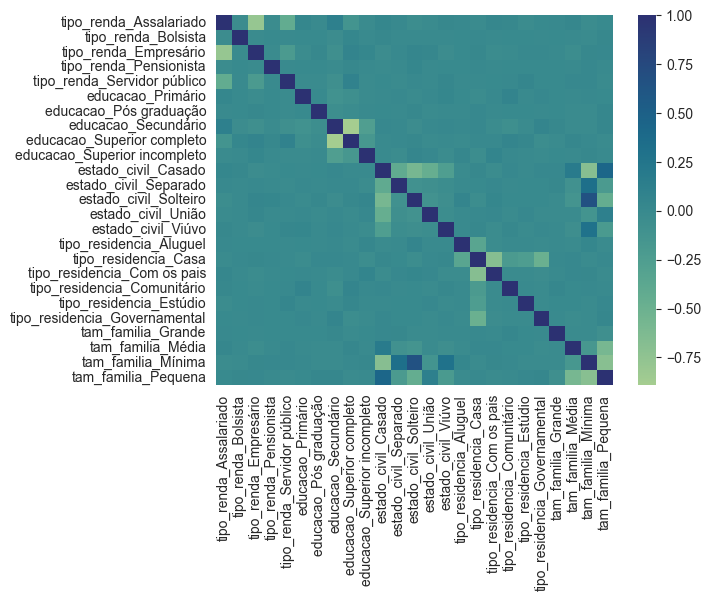

In [21]:
%matplotlib inline
sns.set_style('whitegrid')
sns.heatmap(data=pd.get_dummies(data=df).drop(labels=[col for col in df.columns], errors='ignore', axis=1).corr(), cmap='crest')
plt.show()

Observando a imagem, é notório a baixa correlação generalizada entra as **classes** das variáveis categóricas, com alguns casos isolados de relevantes correlações. Mas devido a dificuldade de discriminar quais são essas correlação, vamos fazer uma busca pelos valores maiores que 0.5 na tabela.

In [22]:
corr = pd.get_dummies(data=df).drop(labels=[col for col in df.columns], errors='ignore', axis=1).corr()
values0 = dict()
values = dict()

for col in corr:
    values0[col] = ([(corr[col].index[corr[col] == item].tolist()[0], item) for item in corr[col] if (item > 0.5) or (item < -0.5)])

for key in values0.keys():
    if len(values0[key]) != 1:
        values[key] = [item for item in values0[key] if item[1] != 1.0]

for key in values.keys():
    print('A classe {} tem correlações com:'.format(key))
    for c, v in values[key]:
        print('> {} igual a {}'.format(c, v))
    print()

A classe tipo_renda_Assalariado tem correlações com:
> tipo_renda_Empresário igual a -0.7890517821093915

A classe tipo_renda_Empresário tem correlações com:
> tipo_renda_Assalariado igual a -0.7890517821093915

A classe educacao_Secundário tem correlações com:
> educacao_Superior completo igual a -0.8907211236221279

A classe educacao_Superior completo tem correlações com:
> educacao_Secundário igual a -0.8907211236221279

A classe estado_civil_Casado tem correlações com:
> estado_civil_Solteiro igual a -0.5877940239922973
> tam_familia_Mínima igual a -0.6853995703717366

A classe estado_civil_Solteiro tem correlações com:
> estado_civil_Casado igual a -0.5877940239922973
> tam_familia_Mínima igual a 0.6624032851648796

A classe tipo_residencia_Casa tem correlações com:
> tipo_residencia_Com os pais igual a -0.6830591237947468

A classe tipo_residencia_Com os pais tem correlações com:
> tipo_residencia_Casa igual a -0.6830591237947468

A classe tam_familia_Média tem correlações com:
>

Avaliando a lista acima, vamos excluir as classes que se relacionam com outras classes da mesma variável, nesse caso, descobrimos duas correlações entre classes de variáveis distintas:
- tam_familia_Mínima x estado_civil_Casado (aprox. -0.68)
- tam_familia_Mínima x estado_civil_Solteiro (aprox. -0.66)


Podemos concluir, até então, que não existem correlações fortes entre as classes das variáveis categóricas.

Vamos analisar a correlação entre todas as variáveis contínuas e as classes das variáveis qualitativas.

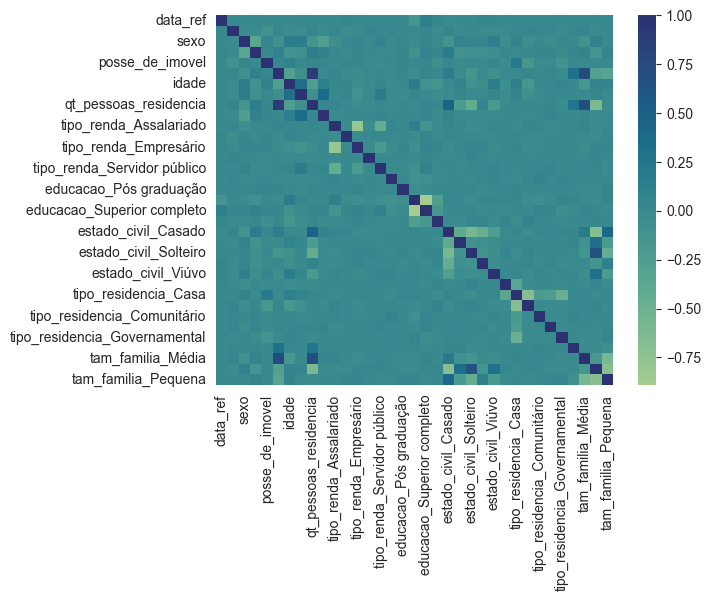

In [23]:
sns.heatmap(data=pd.get_dummies(data=df).corr(), cmap='crest')
plt.show()

Pela imagem é possível notar um padrão semelhante a imagem anterior, de forma semelhante, fica difícil avaliar e separar pares de correlações predominantes, por isso vamos repetir o passo anterior e buscar pelas melhores correlações.

In [24]:
corr = pd.get_dummies(data=df).corr()
values0 = dict()
values = dict()

for col in corr:
    values0[col] = ([(corr[col].index[corr[col] == item].tolist()[0], item) for item in corr[col] if (item > 0.5) or (item < -0.5)])

for key in values0.keys():
    if len(values0[key]) != 1:
        values[key] = [item for item in values0[key] if item[1] != 1.0]

for key in values.keys():
    print('A classe/variável {} tem correlações com:'.format(key))
    for c, v in values[key]:
        print('> {} igual a {}'.format(c, v))
    print()

A classe/variável qtd_filhos tem correlações com:
> qt_pessoas_residencia igual a 0.9030305910050394
> tam_familia_Média igual a 0.7398763378949418

A classe/variável qt_pessoas_residencia tem correlações com:
> qtd_filhos igual a 0.9030305910050394
> tam_familia_Média igual a 0.7018173881300782
> tam_familia_Mínima igual a -0.6030400292555101

A classe/variável tipo_renda_Assalariado tem correlações com:
> tipo_renda_Empresário igual a -0.7890517821093915

A classe/variável tipo_renda_Empresário tem correlações com:
> tipo_renda_Assalariado igual a -0.7890517821093915

A classe/variável educacao_Secundário tem correlações com:
> educacao_Superior completo igual a -0.8907211236221279

A classe/variável educacao_Superior completo tem correlações com:
> educacao_Secundário igual a -0.8907211236221279

A classe/variável estado_civil_Casado tem correlações com:
> estado_civil_Solteiro igual a -0.5877940239922973
> tam_familia_Mínima igual a -0.6853995703717366

A classe/variável estado_civ

Observando a lista acima, podemos identificar algumas pares de correlações fortes:
- qtd_filhos x qt_pessoas_residencia
- qtd_filhos x tam_familia_Média
- qt_pessoas_residencia x tam_familia_Média
- qt_pessoas_residencia x tam_familia_Mínima
- estado_civil_Casado x tam_familia_Mínima
- estado_civil_Solteiro x tam_familia_Mínima

Quatro correlações a mais quando comparado com a lista anterior, vamos nos lembrar dessas relações para a etapa de modelagem. Nós podemos atribuir todas essas correlações à forma como construímos a variável **tam_familia**, contudo, ela revelou para nós uma correlação interessante entre com **estado_civil**, algo que não seria revelado caso não tivéssemos criado a variável.

Para finalizar, vamos verificar a correlação de todas as classes e variáveis com a nossa variável-alvo **renda**.

In [25]:
pd.get_dummies(data=df).assign(renda = df['renda']).corr()['renda']

data_ref                         0.002227
id_cliente                      -0.018035
sexo                            -0.261835
posse_de_veiculo                 0.086338
posse_de_imovel                  0.013563
qtd_filhos                      -0.000560
idade                            0.126804
tempo_emprego                    0.375000
qt_pessoas_residencia            0.017502
renda                            1.000000
tipo_renda_Assalariado          -0.016948
tipo_renda_Bolsista             -0.003203
tipo_renda_Empresário           -0.011560
tipo_renda_Pensionista          -0.008810
tipo_renda_Servidor público      0.045226
educacao_Primário               -0.008291
educacao_Pós graduação          -0.008452
educacao_Secundário              0.000845
educacao_Superior completo       0.014755
educacao_Superior incompleto    -0.030878
estado_civil_Casado              0.055418
estado_civil_Separado           -0.017076
estado_civil_Solteiro           -0.028587
estado_civil_União              -0

Apesar da correlação descoberta, é notório que nenhuma classe ou variável possui uma correlação forte (fator maior que 0.5) com a nossa variável-alvo

Vamos visualizar as informações obtidas em forma de gráficos de barras.

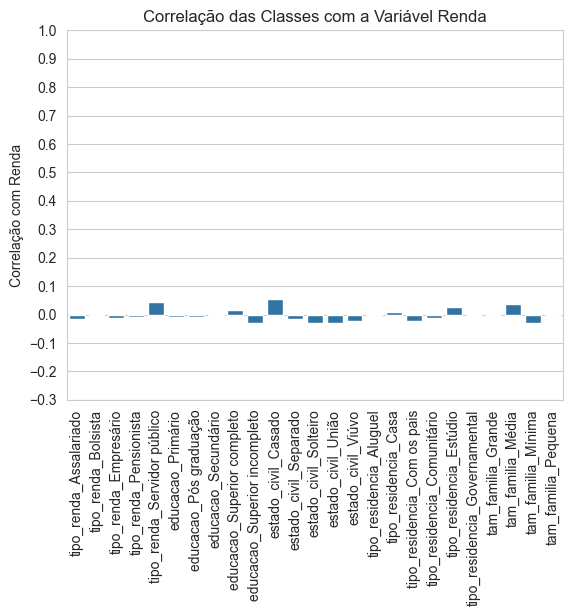

In [26]:
fig, ax = plt.subplots()
sns.barplot(pd.get_dummies(data=df)
            .drop(labels=[col for col in df.columns], errors='ignore', axis=1)
            .assign(renda = df['renda'])
            .corr()
            .drop('renda', axis=0)['renda'], ax=ax)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(ticks=np.arange(-.3, 1.1, .1))
ax.set_ylabel('Correlação com Renda')
plt.title('Correlação das Classes com a Variável Renda')
plt.show()

A partir da imagem, notamos que a correlação das *classes* com a nossa variável-alvo fluta entre 0.1 e 0, positivamente ou negativamente. Com o intuito de comparação, vamos incluir as demais variáveis no gráfico.

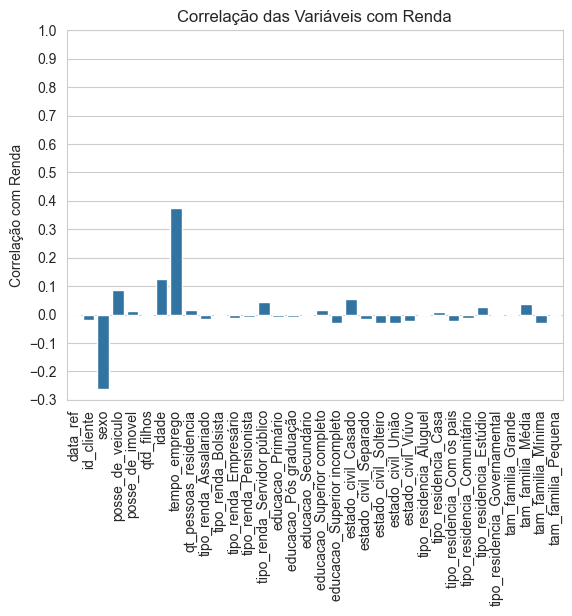

In [27]:
fig, ax = plt.subplots()
sns.barplot(pd.get_dummies(data=df).corr()['renda'].drop('renda', axis=0), ax=ax)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(ticks=np.arange(-.3, 1.1, .1))
ax.set_ylabel('Correlação com Renda')
plt.title('Correlação das Variáveis com Renda')
plt.show()

A partir do gráfico acima criado, podemos identificar alguns pares de variáveis correlacionadas de forma relevante com a variável **renda**:
- sexo com uma correlação negativa entre -0.2 e -0.3
- posse_de_veiculo com uma correlação positiva próxima a 0.1
- idade com uma correlação positiva entre 0.1 e 0.2
- tempo_emprego com uma correlação positiva próxima a 0.4

As demais variáveis, variam entre 0 e 0.1, seja positivamente ou negativamente. Mas todas elas, assim como vimos antes, estando abaixo de 0.5, o nosso fator de relevância.

Com isso, podemos concluir essa etapa sabendo que a variável **renda** não possui fortes correlações com nenhuma outra variável ou classe do nosso conjunto de dados, mas que as variáveis **qtd_filhos, qt_pessoas_residencia, estado_civil e tam_familia** possuem fortes correlações de suas classes entre si.

Também sabemos, a partir da nossa análise de entropia, que as variáveis **sexo, posse_de_veiculo e posse_de_imovel** são um grupo de alta entropia, enquanto as variáveis **estado_civil, tam_familia, tipo_renda e educacao** são um grupo de baixa entropia. A única variável que iremos eliminar dessa etapa, devido a sua baixíssima entropia e nenhuma contribuição com correlações entre classes, variáveis e nossa variável-alvo é a variável **tipo_residencia**.

In [28]:
df = df.drop('tipo_residencia', axis=1)
df.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda,tam_familia
0,2015-01-01,15056,1,0,1,0,Empresário,Secundário,Solteiro,26,6.602740,1,8060.34,Mínima
1,2015-01-01,9968,0,1,1,0,Assalariado,Superior completo,Casado,28,7.183562,2,1852.15,Pequena
2,2015-01-01,4312,1,1,1,0,Empresário,Superior completo,Casado,35,0.838356,2,2253.89,Pequena
3,2015-01-01,10639,1,0,1,1,Servidor público,Superior completo,Casado,30,4.846575,3,6600.77,Pequena
4,2015-01-01,7064,0,1,0,0,Assalariado,Secundário,Solteiro,33,4.293151,1,6475.97,Mínima


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Nossos passos serão:
- Aplicar a técnica de modelagem
- Testar o modelo
- Avaliar do modelo


In [29]:
df = df.drop('data_ref', axis=1).set_index('id_cliente', drop=True)
dummies = pd.get_dummies(df[['tipo_renda', 'educacao', 'estado_civil', 'tam_familia']], dtype=np.int64)
data = pd.concat([df.drop(['tipo_renda', 'educacao', 'estado_civil', 'tam_familia'], axis=1), dummies], axis=1)
data.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Assalariado,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tam_familia_Grande,tam_familia_Média,tam_familia_Mínima,tam_familia_Pequena
id_cliente,,,,,,,,,,,,,,,,,,,,,
15056,1,0,1,0,26,6.602740,1,8060.34,0,0,...,0,0,0,1,0,0,0,0,1,0
9968,0,1,1,0,28,7.183562,2,1852.15,1,0,...,0,1,0,0,0,0,0,0,0,1
4312,1,1,1,0,35,0.838356,2,2253.89,0,0,...,0,1,0,0,0,0,0,0,0,1
10639,1,0,1,1,30,4.846575,3,6600.77,0,0,...,0,1,0,0,0,0,0,0,0,1
7064,0,1,0,0,33,4.293151,1,6475.97,1,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
X = data.drop('renda', axis=1)
y = data['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=412)

print(f'Tamanho base de treino: {X_train.shape[0]} amostras\nTamanho base de teste: {X_test.shape[0]} amostras')

Tamanho base de treino: 6528 amostras
Tamanho base de teste: 1633 amostras


In [43]:
reg0 = DecisionTreeRegressor(random_state=412).fit(X_train, y_train)

path0 = reg0.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas0 = {'ccp_alpha': path0.ccp_alphas}

grid_search = GridSearchCV(estimator=reg, 
                           param_grid=ccp_alphas, 
                           cv=15, 
                           verbose=2, 
                           scoring='r2')

grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 33 candidates, totalling 495 fits
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=15,
             estimator=DecisionTreeRegressor(min_samples_leaf=65,
                                             min_samples_split=326,
                                             random_state=412),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.38699293e+03, 1.46643068e+03, 2.62810324e+03,
       4.52543568e+03, 5.15896952e+03, 5.57013928e+03, 8.64331609e+03,
       9.49888075e+03, 9.58026397e+03, 9.74481618e+03, 9.77783457e+03,
       1.14513400e+04, 1.37969861e+04, 1.44367182e+04, 1.91409988e+04,
       3.27895903e+04, 3.29011223e+04, 3.39361454e+04, 3.63510832e+04,
       4.17501504e+04, 4.20748155e+04, 4.35305041e+04, 6.65291007e+04,
       8.99875941e+04, 9.50316477e+04, 1.57506470e+05, 3.96063585e+05,
       9.25976036e+05, 9.68060872e+05, 3.04448569e+06, 3.49601531e+06,
       9.73672460e+06])},
             scoring='r2', verbose=2)

In [44]:
results = pd.DataFrame(grid_search.cv_results_)
results.iloc[grid_search.best_index_]['mean_test_score']

0.3204826978672507

In [45]:
kfold_best_tree = DecisionTreeRegressor(random_state=412, 
                                        min_samples_leaf=int(X_train.shape[0]*.01), 
                                        min_samples_split=int(X_train.shape[0]*.05),
                                        ccp_alpha=results.iloc[grid_search.best_index_].params['ccp_alpha']).fit(X_train, y_train)

kbt_train_score = kfold_best_tree.score(X_train, y_train)
kbt_test_score = kfold_best_tree.score(X_test, y_test)

print(f'Acurácia na base de treino {kbt_train_score*100:.2f}%')
print(f'Acurácia na base de teste {kbt_test_score*100:.2f}%')

Acurácia na base de treino 35.42%
Acurácia na base de teste 35.99%


Como podemos ver, essa primeira abordagem na criação do modelo resultou em um modelo extremamente impreciso. Vamos tentar uma outra abordagem para a modelagem do modelo.

In [47]:
reg = DecisionTreeRegressor(random_state=412).fit(X_train, y_train)

path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::10]

regs = list()

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=412, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    regs.append(tree)

train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

print(f'Acurácia na base de treino {max(train_scores)*100:.2f}%')
print(f'Acurácia na base de teste {max(test_scores)*100:.2f}%')

Acurácia na base de treino 79.61%
Acurácia na base de teste 43.86%


O modelo criado de forma menos complexa se saiu melhor relativo ao anterior, vamos visualizar a acurácia do modelo num gráfico.

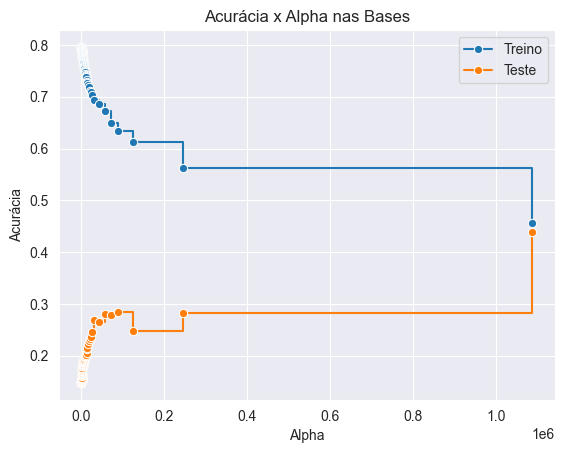

In [48]:
sns.set_style('darkgrid')

fig, ax = plt.subplots()

ax.set_ylabel('Acurácia')
ax.set_xlabel('Alpha')
ax.set_title('Acurácia x Alpha nas Bases')

sns.lineplot(x=ccp_alphas, y=train_scores, drawstyle='steps-post', marker='o', label='Treino', ax=ax)
sns.lineplot(x=ccp_alphas, y=test_scores, drawstyle='steps-post', marker='o', label='Teste', ax=ax)

plt.show()

A partir dessa comparação, vamos treinar uma nova árvore com o melhor valor de **alpha** da nossa pós-podagem e comparar esse valor com a acurácia da árvore criada com k-fold.

In [49]:
regular_best_tree = DecisionTreeRegressor(random_state=412, 
                                          ccp_alpha=ccp_alphas[test_scores.index(max(test_scores))]).fit(X_train, y_train)

rbt_train_score = regular_best_tree.score(X_train, y_train)
rbt_test_score = regular_best_tree.score(X_test, y_test)

In [51]:
print('Resultados')
print('='*80)
print(f'Melhor Árvore Treinada Normalmente Avaliada na Base de Treino: {rbt_train_score*100:.2f}%')
print(f'Melhor Árvore Treinada Normalmente Avaliada na Base de Teste: {rbt_test_score*100:.2f}%')
print(f'Melhor Árvore Treinada K-Fold Avaliada na Base de Treino: {kbt_train_score*100:.2f}%')
print(f'Melhor Árvore Treinada K-Fold Avaliada na Base de Teste: {kbt_test_score*100:.2f}%')

Resultados
Melhor Árvore Treinada Normalmente Avaliada na Base de Treino: 45.59%
Melhor Árvore Treinada Normalmente Avaliada na Base de Teste: 43.86%
Melhor Árvore Treinada K-Fold Avaliada na Base de Treino: 35.42%
Melhor Árvore Treinada K-Fold Avaliada na Base de Teste: 35.99%


# To do list

- Remover variável que foi criada == totalmente inútil
- Tentar alcançar mínimo de 70% na acurácia para avançar o projeto

Vamos analisar as melhores variáveis no modelo e incluíremos os insights que conseguimos na etapa anterior para melhor adequar nossa base de treino e teste.

In [89]:
top5 = pd.DataFrame({'name': regular_best_tree.feature_names_in_, 'importance': regular_best_tree.feature_importances_}).iloc[:5]['name']

X_train_ajs = (X_train[top5]
               .assign(qtd_filhos = df['qtd_filhos'])
               .assign(qt_pessoas_residencia = df['qt_pessoas_residencia'])
               .assign(casado = classes_estado_civil.Casado)
               .assign(separado = classes_estado_civil.Separado)
               .assign(solteiro = classes_estado_civil.Solteiro)
               .assign(uniao = classes_estado_civil.União)
               .assign(viuvo = classes_estado_civil.Viúvo)
               .assign(grande = classes_tam_familia.Grande)
               .assign(media = classes_tam_familia.Média)
               .assign(minima = classes_tam_familia.Mínima)
               .assign(pequena = classes_tam_familia.Pequena)
              )

X_test_ajs = (X_test[top5]
               .assign(qtd_filhos = df['qtd_filhos'])
               .assign(qt_pessoas_residencia = df['qt_pessoas_residencia'])
               .assign(casado = classes_estado_civil.Casado)
               .assign(separado = classes_estado_civil.Separado)
               .assign(solteiro = classes_estado_civil.Solteiro)
               .assign(uniao = classes_estado_civil.União)
               .assign(viuvo = classes_estado_civil.Viúvo)
               .assign(grande = classes_tam_familia.Grande)
               .assign(media = classes_tam_familia.Média)
               .assign(minima = classes_tam_familia.Mínima)
               .assign(pequena = classes_tam_familia.Pequena)
              )

regAjs = DecisionTreeRegressor(random_state=412).fit(X_train_ajs, y_train)

pathAjs = regAjs.cost_complexity_pruning_path(X_train_ajs, y_train)
ccp_alphasAjs = pathAjs.ccp_alphas[::10]

regs = list()

for ccp_alpha in ccp_alphasAjs:
    tree = DecisionTreeRegressor(random_state=412, ccp_alpha=ccp_alpha).fit(X_train_ajs, y_train)
    regs.append(tree)

train_scores_ajs = [reg.score(X_train_ajs, y_train) for reg in regs]
test_scores_ajs = [reg.score(X_test_ajs, y_test) for reg in regs]

print(f'Acurácia na base de treino {max(train_scores_ajs)*100:.2f}%')
print(f'Acurácia na base de teste {max(test_scores_ajs)*100:.2f}%')

Acurácia na base de treino 44.64%
Acurácia na base de teste 3.96%


## Etapa 5 Crisp-DM: Avaliação dos resultados


Apesar dos ajustes, o modelo não parece ter melhorado sua acurácia de forma significativa.

In [52]:
features = pd.DataFrame({'name': regular_best_tree.feature_names_in_, 
                         'importance_regular_tree': regular_best_tree.feature_importances_, 
                         'importance_kfold_tree': kfold_best_tree.feature_importances_})

vars = [features.loc[i, 'name'] for i in range(len(features)) if (features.loc[i, 'importance_regular_tree'] > 0) or (features.loc[i, 'importance_kfold_tree'] > 0)]
vars

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'tipo_renda_Assalariado',
 'tipo_renda_Empresário',
 'educacao_Secundário',
 'educacao_Superior completo',
 'tam_familia_Pequena']

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.